# Notebook to examine the sensitivity of the Knapsack selection algorithm 



In [1]:
import json
from Utils import generate_summary_single, evaluate_summary
import h5py
import matplotlib.pyplot as plt
import numpy as np

Load up the outputs and scores of a model for reference. 
}

In [41]:
results = json.load(open('SensitivityExpt/Attention/F1/results.json'))
split_1_results = json.load(open('SensitivityExpt/Attention/Correlation/split_1_noname.json'))
outputs = json.load(open('SensitivityExpt\summe\outputs.json'))

In [56]:
data_h5 = h5py.File('Data/original/googlenet_summe.h5')

In [62]:
video_index = 'video_10'
user_summary = data_h5[video_index]['user_summary'][...]
shot_bounds = data_h5[video_index]['change_points'][...]
n_frames = data_h5[video_index]['n_frames'][...]
picks = data_h5[video_index]['picks'][...]
ground_truth = data_h5[video_index]['gtscore'][...]
video_10_output = outputs[video_index]

In [63]:
split_1_results

{'video_11': {'kendall': 0.25025294614714755, 'spearman': 0.32943743468240233},
 'video_17': {'kendall': 0.25172516396331124, 'spearman': 0.3295694282196485},
 'video_21': {'kendall': 0.21981649518605623, 'spearman': 0.2893747222216133},
 'video_23': {'kendall': 0.09481866410226644, 'spearman': 0.12348954750778111},
 'video_32': {'kendall': 0.012372066196353242,
  'spearman': 0.01933540115001099},
 'video_34': {'kendall': 0.10346730320445167, 'spearman': 0.13415777695047998},
 'video_35': {'kendall': -0.028895358580330637,
  'spearman': -0.03758822099546422},
 'video_37': {'kendall': 0.28895801551541667, 'spearman': 0.37492363434422793},
 'video_44': {'kendall': 0.1618117315640136, 'spearman': 0.21281642775777052},
 'video_6': {'kendall': 0.07832271914472413, 'spearman': 0.10478356211340127}}

0.17109519


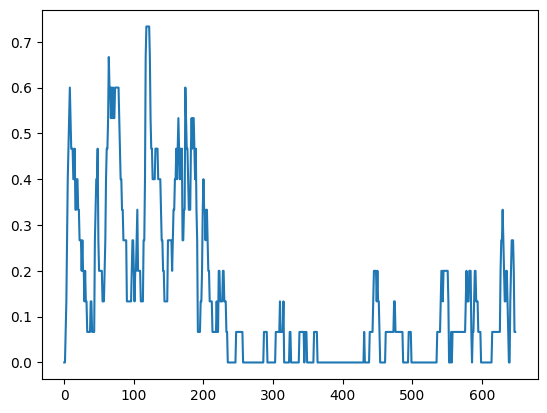

In [64]:
plt.plot(ground_truth)
print(ground_truth.std())

0.022556998824454617

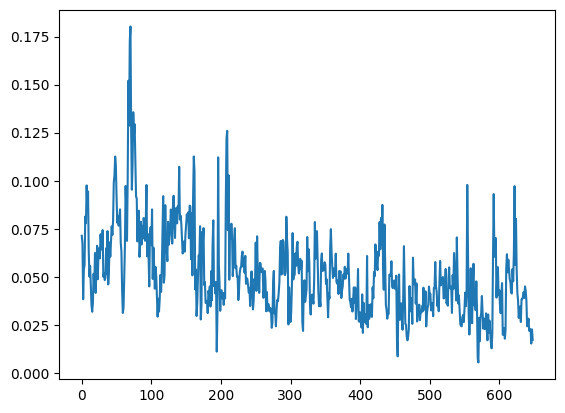

In [65]:
plt.plot(video_10_output)
np.std(video_10_output)

In [192]:
mean_imp= np.mean(video_10_output)
std_imp = np.std(video_10_output)


75.24256872972893


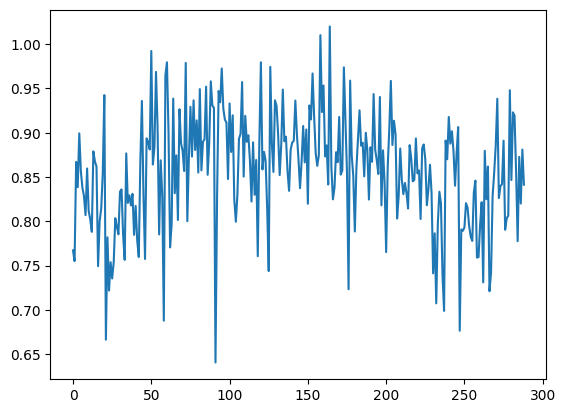

In [208]:
noise = np.random.normal(mean_imp,std_imp,size=len(video_10_output))
summary_scores = []
machine_sum = generate_summary_single(shot_bounds,video_10_output+noise,n_frames,picks)

print(evaluate_summary(machine_sum,user_summary,'tvsum'))
    
plt.plot(video_10_output+noise)

results = '